### Predict Hazard Ratings for a Maintenance Project

All the money in the world can not make up for a loss of life. Better safe than sorry is the motto of
all engineering and construction practices which routinely deal with dangerous situations. However many times , extent of caution is just not enough and leads to very hard learnt lessons in employee safety.

Instead of relying on something going wrong and then taking preventive measure ; organisations are coming up with ways of assessing the extent of danger to life for a new project before even the first hammer strikes .

Given data was masked dataset which contains various properties of tasks taken up in heavy
equipments maintenance by a manual crew. Each of these tasks have been given a hazard score
which is eventually used in deciding levels of safety checks and caution while planning for the
maintenance process.

**Observations:Regression problem** 

its supervised ML problem to predict the Hazard Rating

In [1]:
# impoting the libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np

In [2]:
#  Reading the data 
datafile_train="Hazard_train.csv"
datafile_test="Hazard_test_share.csv"
bd_train=pd.read_csv(datafile_train)
bd_test=pd.read_csv(datafile_test)

In [3]:
#functions to display the all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [4]:
# train data
bd_train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,83642,2,10,23,4,N,K,Y,B,D,E,2,H,B,10,0,A,K,N,52,14,N,8,C,2,37,1,11,2,Y,N,E,2,1
1,92530,6,3,18,2,B,H,N,B,B,D,8,L,B,10,3,A,B,N,39,14,Y,13,A,2,34,1,12,7,Y,N,C,3,3
2,86131,4,5,20,4,B,K,N,B,B,E,7,H,B,15,1,A,K,N,66,10,N,8,C,1,40,1,17,4,Y,N,D,1,1
3,88666,1,4,7,5,N,H,N,B,B,B,8,B,B,15,3,A,B,N,48,11,N,11,B,2,37,1,11,6,Y,N,D,2,1
4,11122,21,10,21,6,N,C,Y,B,C,D,12,L,B,10,1,A,I,N,42,11,N,11,A,2,40,1,6,6,N,N,D,5,5


In [5]:
bd_train.info() 
# 34 columns are present in data; column: 'Id' is irrelavent to target
# column: 'Hazard' is the target 
# its a regression problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      40799 non-null  int64 
 1   Hazard  40799 non-null  int64 
 2   T1_V1   40799 non-null  int64 
 3   T1_V2   40799 non-null  int64 
 4   T1_V3   40799 non-null  int64 
 5   T1_V4   40799 non-null  object
 6   T1_V5   40799 non-null  object
 7   T1_V6   40799 non-null  object
 8   T1_V7   40799 non-null  object
 9   T1_V8   40799 non-null  object
 10  T1_V9   40799 non-null  object
 11  T1_V10  40799 non-null  int64 
 12  T1_V11  40799 non-null  object
 13  T1_V12  40799 non-null  object
 14  T1_V13  40799 non-null  int64 
 15  T1_V14  40799 non-null  int64 
 16  T1_V15  40799 non-null  object
 17  T1_V16  40799 non-null  object
 18  T1_V17  40799 non-null  object
 19  T2_V1   40799 non-null  int64 
 20  T2_V2   40799 non-null  int64 
 21  T2_V3   40799 non-null  object
 22  T2_V4   40799 non-null

In [6]:
bd_test.info()  
# 33 columns present in test dataset; 
#'Hazard' is missing in data compared to training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10200 non-null  int64 
 1   T1_V1   10200 non-null  int64 
 2   T1_V2   10200 non-null  int64 
 3   T1_V3   10200 non-null  int64 
 4   T1_V4   10200 non-null  object
 5   T1_V5   10200 non-null  object
 6   T1_V6   10200 non-null  object
 7   T1_V7   10200 non-null  object
 8   T1_V8   10200 non-null  object
 9   T1_V9   10200 non-null  object
 10  T1_V10  10200 non-null  int64 
 11  T1_V11  10200 non-null  object
 12  T1_V12  10200 non-null  object
 13  T1_V13  10200 non-null  int64 
 14  T1_V14  10200 non-null  int64 
 15  T1_V15  10200 non-null  object
 16  T1_V16  10200 non-null  object
 17  T1_V17  10200 non-null  object
 18  T2_V1   10200 non-null  int64 
 19  T2_V2   10200 non-null  int64 
 20  T2_V3   10200 non-null  object
 21  T2_V4   10200 non-null  int64 
 22  T2_V5   10200 non-null

- **no missing values present in the train & test dataset.**

In [7]:
# creating a object with all 'object' datatype columns
cat_cols=bd_train.select_dtypes(['object']).columns
cat_cols 

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')

16 categorical columns present in the dataset

In [8]:
# creating new column: 'Hazard' in test data set to concat with train data for pre processing
# to concat no of columns in the datasets should be same.
bd_test['Hazard']=np.nan 

# rearranging the columns according to train data
bd_test=bd_test[list(bd_train.columns)]

In [9]:
# test data after rearranging the columns
bd_test.head()  

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,67943,NaN,9,18,2,N,B,Y,B,C,D,12,B,B,20,1,A,D,Y,75,13,N,5,A,2,34,1,14,4,Y,N,E,3,3
1,38287,NaN,12,20,5,N,C,Y,D,B,D,12,B,B,10,1,A,E,N,27,8,Y,15,B,1,40,1,9,3,Y,N,E,1,1
2,51951,NaN,14,18,1,N,K,Y,B,D,E,12,M,C,5,1,A,J,N,55,18,N,18,A,2,25,1,1,4,Y,N,E,2,1
3,40476,NaN,19,16,1,W,H,Y,B,B,D,3,L,B,10,1,A,D,N,25,28,N,16,A,2,25,1,1,7,Y,N,D,2,11
4,101190,NaN,12,21,2,B,K,Y,B,B,E,2,H,B,10,3,D,R,N,51,23,N,10,C,2,22,1,20,6,Y,N,C,2,1


In [10]:
# new column: "data" is added to train and test data 
# for easy segregation of data after preprocessing the data
bd_train['data']='train'
bd_test['data']='test'

# combining the train and test data
all_data=pd.concat([bd_train,bd_test],axis=0,sort=False)

In [11]:
# combined data set size
all_data.shape

(50999, 35)

In [12]:
# no of unique values in each categorical column.
bd_train.select_dtypes('object').nunique()  

T1_V4      8
T1_V5     10
T1_V6      2
T1_V7      4
T1_V8      4
T1_V9      6
T1_V11    12
T1_V12     4
T1_V15     8
T1_V16    18
T1_V17     2
T2_V3      2
T2_V5      6
T2_V11     2
T2_V12     2
T2_V13     5
data       1
dtype: int64

In [13]:
# creating dummies for categorical columns
for col in cat_cols:
    # different categorical values present in column and their counts
    k=all_data[col].value_counts()
    
    # selecting the categorical values with frequency>100 for creating dummies
    # excluding the last categorical value to avoid multicollinearity. 
    cats=k[k>=100].index[:-1]
    
    # creating dummy for each categorical value
    for cat in cats:
        # dummy column name: column_categorical_value
        name=col+'_'+cat
        all_data[name]=(all_data[col]==cat).astype(int)
        
    # deleting the column after creating dummies   
    del all_data[col]

In [14]:
# checking the size of the dataset
all_data.shape

(50999, 94)

In [15]:
# combined dataset
all_data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15,data,T1_V4_N,T1_V4_B,T1_V4_C,T1_V4_W,T1_V4_E,T1_V4_S,T1_V4_G,T1_V5_K,T1_V5_A,T1_V5_H,T1_V5_C,T1_V5_I,T1_V5_B,T1_V5_J,T1_V6_N,T1_V7_B,T1_V7_D,T1_V7_A,T1_V8_B,T1_V8_D,T1_V8_C,T1_V9_D,T1_V9_E,T1_V9_B,T1_V9_F,T1_V9_C,T1_V11_B,T1_V11_H,T1_V11_L,T1_V11_J,T1_V11_A,T1_V11_I,T1_V11_F,T1_V11_M,T1_V11_E,T1_V11_N,T1_V11_D,T1_V12_B,T1_V12_D,T1_V12_C,T1_V15_A,T1_V15_N,T1_V15_C,T1_V15_D,T1_V15_H,T1_V15_W,T1_V16_I,T1_V16_B,T1_V16_R,T1_V16_K,T1_V16_A,T1_V16_E,T1_V16_J,T1_V16_N,T1_V16_D,T1_V16_M,T1_V16_C,T1_V16_L,T1_V16_G,T1_V16_P,T1_V16_H,T1_V16_Q,T1_V16_F,T1_V17_N,T2_V3_N,T2_V5_A,T2_V5_B,T2_V5_C,T2_V5_D,T2_V11_Y,T2_V12_N,T2_V13_E,T2_V13_A,T2_V13_C,T2_V13_D
0,83642,2.0,10,23,4,2,10,0,52,14,8,2,37,1,11,2,2,1,train,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0
1,92530,6.0,3,18,2,8,10,3,39,14,13,2,34,1,12,7,3,3,train,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0
2,86131,4.0,5,20,4,7,15,1,66,10,8,1,40,1,17,4,1,1,train,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1
3,88666,1.0,4,7,5,8,15,3,48,11,11,2,37,1,11,6,2,1,train,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1
4,11122,21.0,10,21,6,12,10,1,42,11,11,2,40,1,6,6,5,5,train,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1


In [16]:
# creating x_train & y_train from combined data and droping the "Id"
x_train=all_data.drop(['Id','Hazard','data'],axis=1)[all_data['data']=='train']
y_train=all_data['Hazard'][all_data['data']=='train'] 

In [17]:
# size of the x_train & y_train data
x_train.shape, y_train.shape

((40799, 91), (40799,))

In [18]:
# creating x_test from combined data and droping the "Id"
x_test=all_data.drop(['Id','Hazard','data'],axis=1)[all_data['data']=='test']

In [19]:
# Normalizing the data using "StandardScaler"
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

# scaling the train and test data based on train data
# nd-array is the output format after scaling
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test) 

In [20]:
# Nd-array is converting into dataframe
x_train_std=pd.DataFrame(x_train_std,columns=x_train.columns)
x_test_std=pd.DataFrame(x_test_std,columns=x_train.columns) 
x_train_std.head() 

,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15,T1_V4_N,T1_V4_B,T1_V4_C,T1_V4_W,T1_V4_E,T1_V4_S,T1_V4_G,T1_V5_K,T1_V5_A,T1_V5_H,T1_V5_C,T1_V5_I,T1_V5_B,T1_V5_J,T1_V6_N,T1_V7_B,T1_V7_D,T1_V7_A,T1_V8_B,T1_V8_D,T1_V8_C,T1_V9_D,T1_V9_E,T1_V9_B,T1_V9_F,T1_V9_C,T1_V11_B,T1_V11_H,T1_V11_L,T1_V11_J,T1_V11_A,T1_V11_I,T1_V11_F,T1_V11_M,T1_V11_E,T1_V11_N,T1_V11_D,T1_V12_B,T1_V12_D,T1_V12_C,T1_V15_A,T1_V15_N,T1_V15_C,T1_V15_D,T1_V15_H,T1_V15_W,T1_V16_I,T1_V16_B,T1_V16_R,T1_V16_K,T1_V16_A,T1_V16_E,T1_V16_J,T1_V16_N,T1_V16_D,T1_V16_M,T1_V16_C,T1_V16_L,T1_V16_G,T1_V16_P,T1_V16_H,T1_V16_Q,T1_V16_F,T1_V17_N,T2_V3_N,T2_V5_A,T2_V5_B,T2_V5_C,T2_V5_D,T2_V11_Y,T2_V12_N,T2_V13_E,T2_V13_A,T2_V13_C,T2_V13_D
0,0.053447,1.622175,0.464580,-1.397197,-0.862538,-1.829149,-0.237356,0.332170,-0.464649,0.066019,0.599505,-0.163553,-0.204687,-1.310946,-0.356599,-0.808406,1.016783,-0.570491,-0.326119,-0.26926,-0.238165,-0.145779,-0.114284,1.615220,-0.524641,-0.497670,-0.425005,-0.301902,-0.264039,-0.060949,-1.128633,0.248728,-0.207363,-0.103933,-3.188829,4.913045,-0.174975,-0.938665,1.173697,-0.239312,-0.224162,-0.070187,-0.710789,1.521016,-0.398455,-0.37206,-0.178295,-0.164347,-0.102843,-0.101619,-0.093289,-0.090715,-0.070187,0.295575,-0.179898,-0.167467,0.341807,-0.196448,-0.181993,-0.122789,-0.102843,-0.068942,-0.475245,-0.459830,-0.440614,2.298805,-0.238682,-0.229419,-0.223256,-0.216269,-0.16739,-0.159485,-0.129214,-0.121238,-0.097859,-0.096445,-0.088912,-0.084168,-0.060949,0.488067,0.691654,-1.405961,-0.531662,3.044514,-0.099756,0.618126,0.471715,0.924027,-0.502113,-0.416531,-0.335422
1,-1.300348,0.823125,-0.683511,0.271057,-0.862538,1.638616,-0.791462,0.332170,0.567261,0.066019,0.084964,-0.163553,-0.067953,1.321515,0.438770,-0.157125,-0.983494,1.752875,-0.326119,-0.26926,-0.238165,-0.145779,-0.114284,-0.619111,-0.524641,2.009362,-0.425005,-0.301902,-0.264039,-0.060949,0.886028,0.248728,-0.207363,-0.103933,0.313595,-0.203540,-0.174975,1.065343,-0.852009,-0.239312,-0.224162,-0.070187,-0.710789,-0.657455,2.509695,-0.37206,-0.178295,-0.164347,-0.102843,-0.101619,-0.093289,-0.090715,-0.070187,0.295575,-0.179898,-0.167467,0.341807,-0.196448,-0.181993,-0.122789,-0.102843,-0.068942,-0.475245,2.174717,-0.440614,-0.435009,-0.238682,-0.229419,-0.223256,-0.216269,-0.16739,-0.159485,-0.129214,-0.121238,-0.097859,-0.096445,-0.088912,-0.084168,-0.060949,0.488067,-1.445809,0.711257,-0.531662,-0.328460,-0.099756,0.618126,0.471715,-1.082219,-0.502113,2.400783,-0.335422
2,-0.913549,1.142745,0.464580,-0.006985,0.212972,-0.673228,0.359375,-0.503715,-0.464649,-1.191463,1.114046,-0.163553,0.615718,-0.257962,-1.151969,-0.808406,-0.983494,1.752875,-0.326119,-0.26926,-0.238165,-0.145779,-0.114284,1.615220,-0.524641,-0.497670,-0.425005,-0.301902,-0.264039,-0.060949,0.886028,0.248728,-0.207363,-0.103933,0.313595,-0.203540,-0.174975,-0.938665,1.173697,-0.239312,-0.224162,-0.070187,-0.710789,1.521016,-0.398455,-0.37206,-0.178295,-0.164347,-0.102843,-0.101619,-0.093289,-0.090715,-0.070187,0.295575,-0.179898,-0.167467,0.341807,-0.196448,-0.181993,-0.122789,-0.102843,-0.068942,-0.475245,-0.459830,-0.440614,2.298805,-0.238682,-0.229419,-0.223256,-0.216269,-0.16739,-0.159485,-0.129214,-0.121238,-0.097859,-0.096445,-0.088912,-0.084168,-0.060949,0.488067,0.691654,-1.405961,-0.531662,3.044514,-0.099756,0.618126,0.471715,-1.082219,-0.502113,-0.416531,2.981320
3,-1.106949,-0.934787,1.038625,0.271057,0.212972,1.638616,-0.407850,-0.294744,0.154497,0.066019,0.599505,-0.163553,-0.204687,0.795023,-0.356599,-0.808406,1.016783,-0.570491,-0.326119,-0.26926,-0.238165,-0.145779,-0.114284,-0.619111,-0.524641,2.009362,-0.425005,-0.301902,-0.264039,-0.060949,0.886028,0.248728,-0.207363,-0.103933,0.313595,-0.203540,-0.174975,-0.938665,-0.852009,4.178646,-0.224162,-0.070187,1.406888,-0.657455,-0.398455,-0.37206,-0.178295,-0.164347,-0.102843,-0.101619,-0.093289,-0.090715,-0.070187,0.295575,-0.179898,-0.167467,0.341807,-0.196448,-0.181993,-0.122789,-0.102843,

In [21]:
# target variable: value and their counts
bd_train['Hazard'].value_counts()

Hazard
1     15229
4      6561
2      4939
5      2902
7      2651
3      1632
8      1434
6      1114
10     1048
11      633
9       594
13      442
12      311
14      304
16      183
17      154
15      142
19      111
18       90
20       71
22       53
25       34
23       31
28       27
21       20
26       20
29       12
24       11
34        6
30        5
31        5
27        4
32        4
41        2
37        2
38        2
46        2
42        2
40        2
63        1
49        1
44        1
39        1
69        1
52        1
33        1
64        1
51        1
35        1
Name: count, dtype: int64

<Axes: xlabel='Hazard', ylabel='Density'>

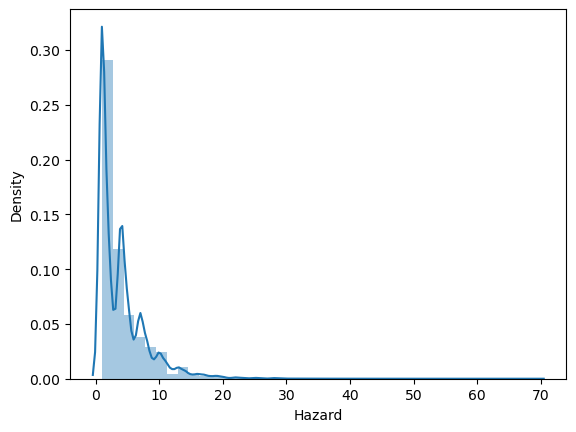

In [22]:
# distribution of targe variable: 'Hazard'
import seaborn as sns
sns.distplot(bd_train['Hazard'],bins=40) 

**'Hazard' is discrete positive data and distribution looks like poissions distribution(approx).**

In [23]:
## results report function
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        # np.flatnonzero extracts index of `True` in a boolean array
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        
        for candidate in candidates:
             # print rank of the model
             # values passed to function format here are put in the curly brackets when printing
             # 0 , 1 etc refer to placeholder for position of values passed to format function
             # .3f means upto 3 decimal digits
            print("Model with rank: {0}".format(i))
            # this prints cross validate performance and its standard deviation
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            # prints the paramter combination for which this performance was obtained
            print("Parameters: {0}".format(results['params'][candidate]))
            # creates space b/w the output of each iteration
            print("") 

### Model training , evaluation and selection:

#### Lasso Regression:

In [24]:
# importing the libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# storing the model in a object
model=Lasso(fit_intercept=True)

In [27]:
### trail1
## hyper perameter tuning using cross-validation
# parameters 
params={'alpha':np.linspace(0.0001,10,100)}

# evaluating the model using Cross-validation
gs_lasso=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error',n_jobs=-1,verbose=10)
gs_lasso.fit(x_train_std,y_train)

# performance of different model and their parameters
report(gs_lasso.cv_results_,3) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: -2.739985 (std: 0.045581)
Parameters: {'alpha': 0.0001}

Model with rank: 2
Mean validation score: -2.763022 (std: 0.043986)
Parameters: {'alpha': 0.10110909090909091}

Model with rank: 3
Mean validation score: -2.785462 (std: 0.043344)
Parameters: {'alpha': 0.2021181818181818}



As models best hyper parameter "alpha" hiting the lower limit then there is a chance that if we lower the "alpha" there is a chance that we can improve performance of the model.

In [30]:
### trail2
## hyper perameter tuning using cross-validation
# parameters 
params={'alpha':np.linspace(0.00001,1,100)}

# evaluating the model using Cross-validation
gs_lasso=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error',n_jobs=-1,verbose=10)
gs_lasso.fit(x_train_std,y_train)

# performance of different model and their parameters
report(gs_lasso.cv_results_,3) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: -2.739969 (std: 0.045599)
Parameters: {'alpha': 1e-05}

Model with rank: 2
Mean validation score: -2.740550 (std: 0.045169)
Parameters: {'alpha': 0.01011090909090909}

Model with rank: 3
Mean validation score: -2.742579 (std: 0.044914)
Parameters: {'alpha': 0.02021181818181818}



In [36]:
# Mean absolute error(MAE) of the PoissionsRegression
MAE=abs(gs_lasso.best_score_)
MAE

2.739968917170693

model peformance is not improved much after changing the alpha. so, our performance is **mean absolute error=2.739969**

#### PoissionRegresion:
'Hazard' is discrete positive data and distribution looks like poissions distribution(approx).

In [32]:
# Poisson Regression involves regression models in which 
# the response variable is in the form of counts(possitive integer) and not fractional numbers.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import PoissonRegressor
pr=PoissonRegressor(fit_intercept=True,max_iter=500) 
pr.get_params() 

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 500,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
## hyper perameter tuning using cross-validation
# parameters 
params={'alpha': np.linspace(0.00001,1,100)}

# evaluating the model using Cross-validation
gs=GridSearchCV(pr,cv=10,param_grid=params,scoring='neg_mean_absolute_error',n_jobs=-1,verbose=10) 
gs.fit(x_train_std,y_train) 

# performance of different model and their parameters
report(gs.cv_results_,5) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: -2.739583 (std: 0.045909)
Parameters: {'alpha': 0.01011090909090909}

Model with rank: 2
Mean validation score: -2.739598 (std: 0.045785)
Parameters: {'alpha': 0.02021181818181818}

Model with rank: 3
Mean validation score: -2.739632 (std: 0.045710)
Parameters: {'alpha': 0.030312727272727272}

Model with rank: 4
Mean validation score: -2.739651 (std: 0.045668)
Parameters: {'alpha': 0.04041363636363637}

Model with rank: 5
Mean validation score: -2.739672 (std: 0.045652)
Parameters: {'alpha': 0.05051454545454546}



In [38]:
# Mean absolute error(MAE) of the PoissionsRegression
MAE=abs(gs.best_score_)
MAE

2.739582753296829

## XGboost Regression: 

#### Sequenctial Tuning of XGBoost Regressor: 
- First we fix the parameters with most volatile performance (i.e no of trees or n_estimators, learning rate)

- Second controling the individual tree(weak learner):
             
             ## control the tree depth 
             - 'gamma'or 'min_split_loss': min loss reduction reqired to split (higher is conservative)
             - 'min_child_weight': minimum number of instances needed to be in each node(higher is conservative)
             - 'max_depth':max depth of individual tree (lower is better) 
             
             ## to avoid the noise in the data
             - 'subsample': subsampling ratio of training instances(0 to 1)
             - 'colsample_bytree': subsampling ratio of columns for each tree
             
- regularization parameters:

             - 'lambda': Ridge or L2
             - 'alpha': lasso or L1 

In [39]:
# importing the "XGBoost Reregressor" from sklearn
from xgboost.sklearn import XGBRegressor
model=XGBRegressor(objective='count:poisson',learning_rate=0.1) 

In [41]:
# As learning rate is inversely proportional to no of estimators
# fixing the decent learning rate(0.05) and tuning for the no of estimators
xgb_params = { "n_estimators":[25,50,100,150,200,300,500] }

# storing the model in a object and searing the for best hyper parameters
xgb1=XGBRegressor(learning_rate=0.05,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)
grid_search_xgb1=GridSearchCV(xgb1,cv=10,param_grid=xgb_params,scoring='neg_mean_absolute_error',verbose=10,n_jobs=-1)

# traing the models on train data
grid_search_xgb1.fit(x_train_std,y_train)

# performance of different models
report(grid_search_xgb1.cv_results_,3) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Model with rank: 1
Mean validation score: -2.694093 (std: 0.047443)
Parameters: {'n_estimators': 200}

Model with rank: 2
Mean validation score: -2.694975 (std: 0.048587)
Parameters: {'n_estimators': 300}

Model with rank: 3
Mean validation score: -2.697099 (std: 0.046762)
Parameters: {'n_estimators': 150}



In [46]:
# controling the individual tree to avoid overfiting
xgb_params = {"gamma":[0,2,5,8,10,12],
              "max_depth": [2,3,4,5,6,7,8],
              "min_child_weight":range(30,200,10)}

xgb2=XGBRegressor(n_estimators=200,learning_rate=0.05,
                   subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

grid_search_xgb2=RandomizedSearchCV(xgb2,param_distributions=xgb_params,cv=10,n_iter=50,
                            # sklearn alway try to maximize the score, but we need error(MAE) min.
                            # error function is mutiplied with -1 then our error function will becomes maximizaion function.
                            scoring='neg_mean_absolute_error',                                 
                            verbose=10,n_jobs=-1)

grid_search_xgb2.fit(x_train_std,y_train)

report(grid_search_xgb2.cv_results_,3) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Model with rank: 1
Mean validation score: -2.686723 (std: 0.046879)
Parameters: {'min_child_weight': 80, 'max_depth': 8, 'gamma': 5}

Model with rank: 2
Mean validation score: -2.686741 (std: 0.046312)
Parameters: {'min_child_weight': 110, 'max_depth': 8, 'gamma': 0}

Model with rank: 3
Mean validation score: -2.687308 (std: 0.047598)
Parameters: {'min_child_weight': 100, 'max_depth': 7, 'gamma': 8}



In [47]:
xgb_params = {'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)]} 

xgb3=XGBRegressor( min_child_weight=80, max_depth=8, gamma=5, 
                   n_estimators=200,learning_rate=0.05,
                   subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

grid_search_xgb3=GridSearchCV(xgb3,param_grid=xgb_params,cv=10,
                             scoring='neg_mean_absolute_error', verbose=10,n_jobs=-1) 

grid_search_xgb3.fit(x_train_std,y_train)

report(grid_search_xgb3.cv_results_,3)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Model with rank: 1
Mean validation score: -2.685324 (std: 0.045785)
Parameters: {'colsample_bytree': 0.6, 'subsample': 0.8}

Model with rank: 2
Mean validation score: -2.686432 (std: 0.045521)
Parameters: {'colsample_bytree': 0.5, 'subsample': 0.8}

Model with rank: 3
Mean validation score: -2.686700 (std: 0.046664)
Parameters: {'colsample_bytree': 0.5, 'subsample': 0.9}



In [51]:
%%time
xgb_params={'reg_lambda':[i/10 for i in range(0,50,5)],
            'reg_alpha':[i/10 for i in range(0,50,5)]} 

xgb4=XGBRegressor( n_estimators=200,learning_rate=0.05,
                   min_child_weight=80, max_depth=8, gamma=5, 
                   subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.6)

grid_search_xgb4=GridSearchCV(xgb3,param_grid=xgb_params,cv=10,
                             scoring='neg_mean_absolute_error', verbose=10,n_jobs=-1) 

grid_search_xgb4.fit(x_train_std,y_train)

report(grid_search_xgb4.cv_results_,3)  

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: -2.684922 (std: 0.047390)
Parameters: {'reg_alpha': 3.0, 'reg_lambda': 3.5}

Model with rank: 2
Mean validation score: -2.685352 (std: 0.047339)
Parameters: {'reg_alpha': 4.0, 'reg_lambda': 3.0}

Model with rank: 3
Mean validation score: -2.685556 (std: 0.048066)
Parameters: {'reg_alpha': 0.5, 'reg_lambda': 1.0}



In [52]:
# Mean absolute error(MAE) of the PoissionsRegression
MAE=abs(grid_search_xgb4.best_score_)
MAE

2.6849219623508014

The best model out of all till now is XGBoost. predict the "Hazard" rating using XGBoost Regressor.

In [53]:
# final model
xgb_final=grid_search_xgb4.best_estimator_
xgb_predictions=pd.DataFrame({'Hazard':xgb_final.predict(x_test_std)}) 
xgb_predictions.to_csv('Hazard Ratings_predictions_xgb.csv',index=False) 